Install Libraries

In [1]:
!pip install transformers datasets torch scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from transformers import pipeline
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

Set the pipeline

In [4]:
def analyze_sentiment(text):
    result = sentiment_pipeline(text)
    return result

Prediction and Evaluation metrics


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Text: I love this product, it's amazing!
Predicted Sentiment: POSITIVE
--------------------------------------------------
Text: This is the worst experience I've had.
Predicted Sentiment: NEGATIVE
--------------------------------------------------
Text: The product is okay, neither good nor bad.
Predicted Sentiment: POSITIVE
--------------------------------------------------
Text: I really dislike the customer service.
Predicted Sentiment: NEGATIVE
--------------------------------------------------
Text: The movie was neither great nor bad.
Predicted Sentiment: POSITIVE
--------------------------------------------------
Precision: 0.6666666666666666
Recall: 0.8
F1 Score: 0.72
Accuracy: 0.8


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


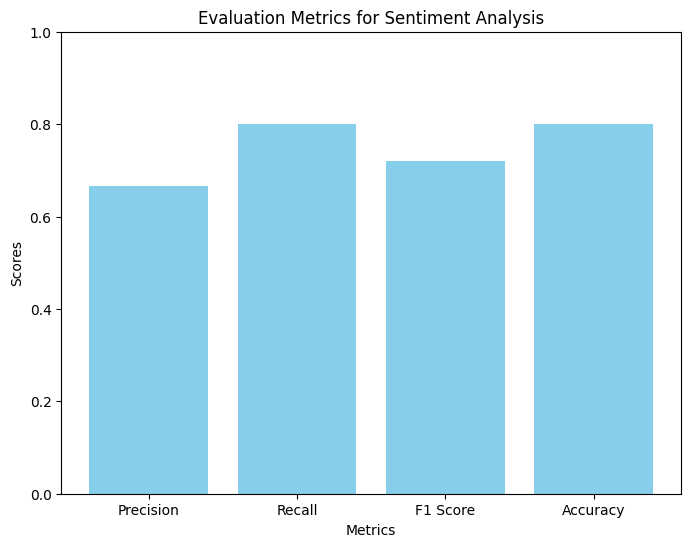

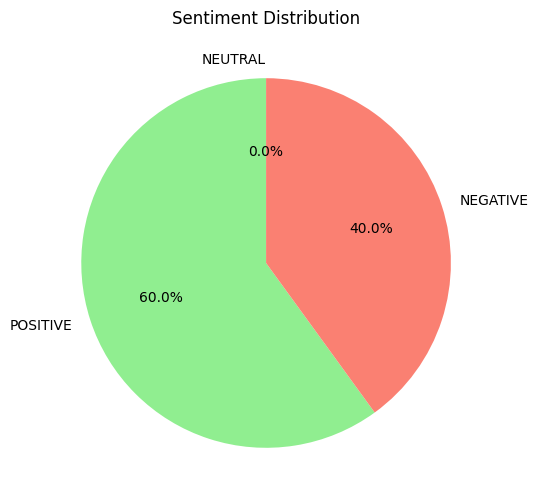

In [5]:
# Initialize the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Function to perform sentiment analysis
def analyze_sentiment(text):
    result = sentiment_pipeline(text)
    return result

# Sample ground truth labels (for evaluation)
true_labels = ['POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEUTRAL']
# Sample texts for sentiment analysis
texts = [
    "I love this product, it's amazing!",
    "This is the worst experience I've had.",
    "The product is okay, neither good nor bad.",
    "I really dislike the customer service.",
    "The movie was neither great nor bad."
]

# Perform sentiment analysis and collect predictions
predictions = []
for text in texts:
    result = analyze_sentiment(text)
    predictions.append(result[0]['label'])

# Print results
for text, prediction in zip(texts, predictions):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {prediction}")
    print("-" * 50)

# Convert labels to numerical format for evaluation
label_mapping = {'POSITIVE': 1, 'NEGATIVE': 0, 'NEUTRAL': 2}
true_labels_numeric = [label_mapping[label] for label in true_labels]
predictions_numeric = [label_mapping[label] for label in predictions]

# Calculate precision, recall, F1 score, and accuracy
precision, recall, f1, _ = precision_recall_fscore_support(true_labels_numeric, predictions_numeric, average='weighted')
accuracy = accuracy_score(true_labels_numeric, predictions_numeric)

# Display evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# Plot the evaluation metrics
metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Accuracy': accuracy}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metrics for Sentiment Analysis')
plt.ylim(0, 1)
plt.show()

# Plot the sentiment distribution as a pie chart
sentiment_counts = {'POSITIVE': predictions.count('POSITIVE'),
                    'NEGATIVE': predictions.count('NEGATIVE'),
                    'NEUTRAL': predictions.count('NEUTRAL')}

# Pie chart visualization
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon', 'lightgray'])
plt.title('Sentiment Distribution')
plt.show()
